# **IA: Handwritten digit recognition**

## *import libraries*

In [1]:
import torch
from torch import nn
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from torch import nn, optim
from time import time
from PySide2.QtWidgets import QApplication, QMainWindow, QPushButton, QTextEdit
from PySide2.QtGui import QImage, QPainter, QMouseEvent, QPen, QPaintEvent
from PySide2.QtCore import Qt, QPoint
from PIL import Image

In [2]:
train_data = tv.datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

In [3]:
#train_data 

Text(0.5, 1.0, '5')

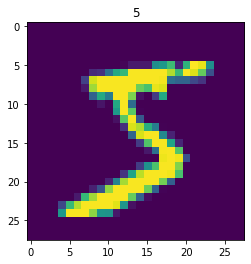

In [4]:
# un test
plt.imshow(train_data[0][0].view(28,28))
plt.title(train_data[0][1]) 


# *Charger le data dans le dataloaders*

In [5]:
batch_size = 32
train, valid =torch.utils.data.random_split(train_data,[50000,10000])
train_loader= torch.utils.data.DataLoader(train, batch_size=batch_size)
valid_loader= torch.utils.data.DataLoader(valid, batch_size=batch_size)

# *test*

In [6]:
#for images, labels in train_loader:
  #grid = tv.utils.make_grid(images)
  #plt.imshow(grid.numpy().transpose((1,2,0)))
  #plt.title(labels.numpy())
  #plt.show()
  
  #break;

# *feature extraction*

In [7]:

def feature_extraction(image,nbr):
      pnc=0
      pni=0 
      
      ftr1=0
      ftr2=0
      ftr3=0
      
      for j in range(28):
        for i in range (28):
          if (image[nbr][0][0][j][i]==0):
             pni =pni+1  
  
      
      c=image[nbr][0]
      b=c.view(1,1,16,7,7) 
      array1=[] 
      array2=[] 
      array3=[] 
      x=[]  
      y=[]  
      for k in range(16):
        for j in range(7):
          for i in range(7):
           if (b[0][0][k][j][i]==0):
            pnc=pnc+1  
           if (b[0][0][k][j][i]!=0):
            y.append(i)
            x.append(j)
        ftr1=pnc/pni 
        array1.append(ftr1) 
        p=0 
        from scipy.stats import linregress
        if (x!=[]):
         p=linregress(x, y).slope 
         ftr2=2*p/(1+p*p) 
         ftr3=(1-p*p)/(1+p*p) 
        else : 
         ftr2=0
         ftr3=1
         
        array2.append(ftr2)
        array3.append(ftr3)
      return (array1,array2,array3)
        

In [8]:
#test
#feature_extraction(train_data,10)


# *Tensor de taill 16x3*

In [9]:
x = torch.Tensor(list(feature_extraction(train_data,4))) 
print (torch.transpose(x, 0, 1)) #tensor sous forme [16*3]
print (x)

tensor([[ 0.0763,  0.0000,  1.0000],
        [ 0.1526,  0.0000,  1.0000],
        [ 0.2290,  0.0000,  1.0000],
        [ 0.3053,  0.0000,  1.0000],
        [ 0.3520, -0.1881,  0.9821],
        [ 0.4019, -0.0522,  0.9986],
        [ 0.4564, -0.1016,  0.9948],
        [ 0.5016,  0.0738,  0.9973],
        [ 0.5421, -0.0402,  0.9992],
        [ 0.6012,  0.0096,  1.0000],
        [ 0.6667,  0.0658,  0.9978],
        [ 0.7321,  0.0751,  0.9972],
        [ 0.7960,  0.0233,  0.9997],
        [ 0.8676,  0.0240,  0.9997],
        [ 0.9299,  0.0654,  0.9979],
        [ 1.0000,  0.0702,  0.9975]])
tensor([[ 0.0763,  0.1526,  0.2290,  0.3053,  0.3520,  0.4019,  0.4564,  0.5016,
          0.5421,  0.6012,  0.6667,  0.7321,  0.7960,  0.8676,  0.9299,  1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -0.1881, -0.0522, -0.1016,  0.0738,
         -0.0402,  0.0096,  0.0658,  0.0751,  0.0233,  0.0240,  0.0654,  0.0702],
        [ 1.0000,  1.0000,  1.0000,  1.0000,  0.9821,  0.9986,  0.9948,  0.9973,


In [10]:
train , val =torch.utils.data.random_split(train_data,[50000,10000])
train_loader=torch.utils.data.DataLoader(train,batch_size=24)
val_loader=torch.utils.data.DataLoader(val,batch_size=24)

# *création du réseau de neuron*

In [11]:
input_size = 784
hidden_sizes = [64, 32]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [12]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

# *Core Training Process*

In [13]:
SGDoptimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        SGDoptimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        SGDoptimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6381996843084379
Epoch 1 - Training loss: 0.25450515456411865
Epoch 2 - Training loss: 0.18598786250673835
Epoch 3 - Training loss: 0.1467633237622074
Epoch 4 - Training loss: 0.12085239167974085
Epoch 5 - Training loss: 0.10226621743579414
Epoch 6 - Training loss: 0.08796641830730989
Epoch 7 - Training loss: 0.07639633603006353
Epoch 8 - Training loss: 0.06675547186337544
Epoch 9 - Training loss: 0.058857164943595004
Epoch 10 - Training loss: 0.0521148114651112
Epoch 11 - Training loss: 0.04634691768226935
Epoch 12 - Training loss: 0.0411090055376725
Epoch 13 - Training loss: 0.036668390465497316
Epoch 14 - Training loss: 0.032409867360454085

Training Time (in minutes) = 3.179227431615194


In [14]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 3


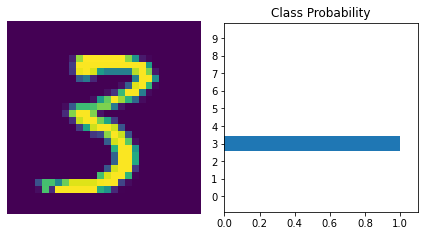

In [15]:
images, labels = next(iter(val_loader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

## *sauvgarder notre model*

In [16]:
# Specify a path
PATH = "projet_ia2.pt"

# Save
torch.save(model.state_dict(), PATH)


# ***l'interface graphique:***

In [17]:
def prepare_image(path: str):
    """
    Converting image to MNIST dataset format
    """

    im = Image.open(path).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    new_image = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        new_image.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        new_image.paste(img, (wleft, 4))  # paste resized image on white canvas

    pixels = list(new_image.getdata())  # get pixel values
    pixels_normalized = [(255 - x) * 1.0 / 255.0 for x in pixels]

    # Need adequate shape
    adequate_shape = np.reshape(pixels_normalized, (1, 28, 28))
    output = torch.FloatTensor(adequate_shape).unsqueeze(0)
    return output

In [18]:

PATH = "projet_ia2.pt"
NET = model
NET.load_state_dict(torch.load(PATH))
NET.eval()


class Window(QMainWindow):

    def __init__(self):
        super().__init__()
        self.setFixedSize(400, 400)
        self.setWindowTitle('Handwritten digit recognition')

        self.image = QImage(self.size(), QImage.Format_RGB32)
        self.image.fill(Qt.white)

        self.init_text()

        self.drawing = False
        self.brush_size = 8
        self.brush_color = Qt.black
        self.last_point = QPoint()

        self.init_btn_clear()
        self.init_btn_recognize()

    def mousePressEvent(self, event: QMouseEvent):
        if event.button() == Qt.LeftButton:
            self.drawing = True
            self.last_point = event.pos()

    def mouseMoveEvent(self, event: QMouseEvent):
        if (event.buttons() & Qt.LeftButton) & self.drawing:
            painter = QPainter(self.image)
            painter.setPen(QPen(self.brush_color, self.brush_size, Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin))
            painter.drawLine(self.last_point, event.pos())
            self.last_point = event.pos()
            self.update()

    def mouseReleaseEvent(self, event: QMouseEvent):
        if event.button() == Qt.LeftButton:
            self.drawing = False

    def paintEvent(self, event: QPaintEvent):
        canvas_painter = QPainter(self)
        canvas_painter.drawImage(self.rect(), self.image, self.image.rect())

    def init_btn_clear(self):
        btn = QPushButton('Clear', self)
        btn.resize(80, 25)
        btn.move(50, 340)
        btn.show()
        btn.clicked.connect(self.clear)

    def clear(self):
        self.image.fill(Qt.white)
        self.text.setText('')
        self.update()

    def init_btn_recognize(self):
        btn = QPushButton('Recognize', self)
        btn.resize(80, 25)
        btn.move(150, 340)
        btn.show()
        btn.clicked.connect(self.recognize)

    def init_text(self):
        self.text = QTextEdit(self)
        self.text.setReadOnly(True)
        self.text.setLineWrapMode(QTextEdit.NoWrap)
        self.text.insertPlainText('')
        font = self.text.font()
        font.setFamily('Rockwell')
        font.setPointSize(25)
        self.text.setFont(font)
        self.text.resize(50, 50)
        self.text.move(266, 324)

    def recognize(self):
        # Convert to image
        image = self.image.convertToFormat(QImage.Format_ARGB32)
        width = image.width()
        height = image.height()
        ptr = image.constBits()
        arr = np.frombuffer(ptr, np.uint8).reshape((height, width, 4))
        im = Image.fromarray(arr[..., :3])
        im.save('dataset/img.png')

        # Evaluate net and show result
        input_img = prepare_image('dataset/img.png')
        prediction = torch.argmax(NET(input_img)).item()
        self.text.setText(' '+str(prediction))

In [ ]:
import sys
app = QApplication(sys.argv)
window = Window()
window.show()
app.exec_()